In [1]:
import requests

In [2]:
import json

In [3]:
import random

In [4]:
import re

In [5]:
key = 'd443d2d31a9bdd6af0e1e070842504a2'

In [6]:
lat = 18
lon=83

In [7]:
url = f"https://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&appid={key}"

In [8]:
response  = requests.get(url)
weather_data = response.json()
weather_data.keys()

dict_keys(['cod', 'message', 'cnt', 'list', 'city'])

In [9]:
weather_data['list'][0]

{'dt': 1731283200,
 'main': {'temp': 297.85,
  'feels_like': 298.23,
  'temp_min': 294.24,
  'temp_max': 297.85,
  'pressure': 1012,
  'sea_level': 1012,
  'grnd_level': 982,
  'humidity': 71,
  'temp_kf': 3.61},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'clouds': {'all': 100},
 'wind': {'speed': 1.73, 'deg': 344, 'gust': 1.45},
 'visibility': 10000,
 'pop': 0,
 'sys': {'pod': 'n'},
 'dt_txt': '2024-11-11 00:00:00'}

In [16]:
import pandas as pd

In [10]:
temperature = [item['main']['temp'] for item in weather_data['list']]

In [11]:
humidity = [item['main']['humidity'] for item in weather_data['list']]

In [14]:
wind_speed = [item['wind']['speed'] for item in weather_data['list']]

In [22]:
timestamp = [pd.to_datetime(item['dt'],unit='s') for item in weather_data['list']]

In [26]:
df = pd.DataFrame({
    'timestamp' : [pd.to_datetime(item['dt'],unit='s') for item in weather_data['list']],
    'temperature' : [item['main']['temp'] for item in weather_data['list']],
    'humidity' : [item['main']['humidity'] for item in weather_data['list']],
    'wind_speed' : [item['wind']['speed'] for item in weather_data['list']]
    
})

In [27]:
df.isnull().sum()

timestamp      0
temperature    0
humidity       0
wind_speed     0
dtype: int64

In [28]:
df.head()

,timestamp,temperature,humidity,wind_speed
0,2024-11-11 00:00:00,297.85,71,1.73
1,2024-11-11 03:00:00,299.56,61,1.21
2,2024-11-11 06:00:00,303.65,40,3.15
3,2024-11-11 09:00:00,303.38,44,3.98
4,2024-11-11 12:00:00,298.55,64,1.79


In [30]:
df = df.set_index('timestamp')

In [31]:
daily_mean_temp = df['temperature'].resample('D').mean()

In [32]:
daily_mean_temp 

timestamp
2024-11-11    299.05375
2024-11-12    298.98875
2024-11-13    298.91625
2024-11-14    298.88750
2024-11-15    298.87000
Freq: D, Name: temperature, dtype: float64

In [33]:
import matplotlib.pyplot as plt

<AxesSubplot: xlabel='timestamp'>

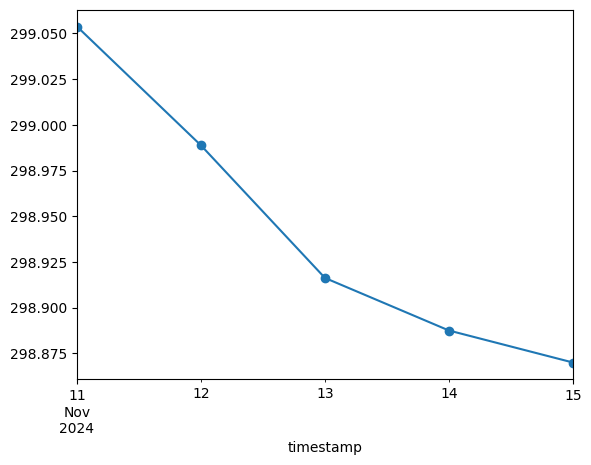

In [36]:
daily_mean_temp.plot(marker='o')

In [38]:
import folium

In [39]:
geo = folium.Map([18,83])

In [41]:
folium.Marker([18,83],popup='Pune').add_to(geo)

In [43]:
geo.save('practice.html')

In [44]:
correlation = df[['temperature','humidity','wind_speed']].corr()

In [46]:
import seaborn as sns

C:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:177: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


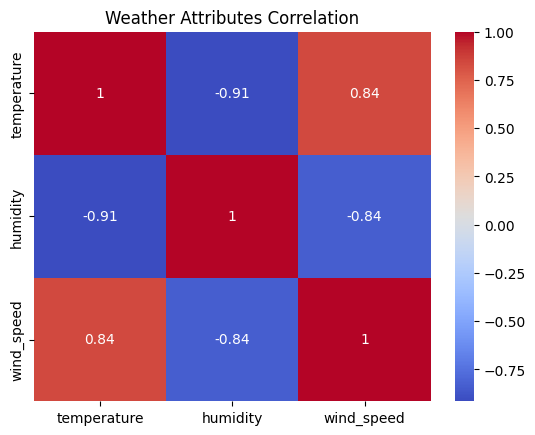

In [47]:
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Weather Attributes Correlation')
plt.show()